# Análise de Dados com Python

### Desafio:

Você trabalha em uma empresa de telecom e tem clientes de vários serviços diferentes, entre os principais: internet e telefone.

O problema é que, analisando o histórico dos clientes dos últimos anos, você percebeu que a empresa está com Churn de mais de 26% dos clientes.

Isso representa uma perda de milhões para a empresa.

O que a empresa precisa fazer para resolver isso?

Base de Dados: https://drive.google.com/drive/folders/1T7D0BlWkNuy_MDpUHuBG44kT80EmRYIs?usp=sharing <br>
Link Original do Kaggle: https://www.kaggle.com/radmirzosimov/telecom-users-dataset

In [ ]:
# Lógica

# passo 1: importar a base de dados
# passo 2: Visualizar a base de dados
# Passo 3: tratamento de dados(corrigir os problemas da base de dados): 
    # coluna inútil
    # valores reconhecidos de forma errada
    # tratar valores vazios
    
# passo 4: Análise Inicial
# passo 5: análise detalhada dos clientes

In [1]:
# Passo 1: Importar a base de dados
import pandas as pd

tabela = pd.read_csv("telecom_users.csv")

# Passo 2: Visualizar a base de dados
tabela = tabela.drop("Unnamed: 0", axis=1)
display(tabela)
# - Entender quais as informações tão disponíveis
# - Descobrir as cagadas da base de dados

IDCliente     Genero  Aposentado Casado Dependentes  MesesComoCliente  \
0     7010-BRBUU  Masculino           0    Sim         Sim                72   
1     9688-YGXVR   Feminino           0    Nao         Nao                44   
2     9286-DOJGF   Feminino           1    Sim         Nao                38   
3     6994-KERXL  Masculino           0    Nao         Nao                 4   
4     2181-UAESM  Masculino           0    Nao         Nao                 2   
...          ...        ...         ...    ...         ...               ...   
5981  0684-AOSIH  Masculino           0    Sim         Nao                 1   
5982  5982-PSMKW   Feminino           0    Sim         Sim                23   
5983  8044-BGWPI  Masculino           0    Sim         Sim                12   
5984  7450-NWRTR  Masculino           1    Nao         Nao                12   
5985  4795-UXVCJ  Masculino           0    Nao         Nao                26   

     ServicoTelefone MultiplasLinhas ServicoInternet ServicoSegurancaOnline  \
0                Sim             Sim             Nao            SemInternet   
1                Sim             Nao           Fibra                    Nao   
2                Sim             Sim           Fibra                    Nao   
3                Sim             Nao             DSL                    Nao   
4                Sim             Nao             DSL                    Sim   
...              ...             ...             ...                    ...   
5981             Sim             Nao           Fibra                    Sim   
5982             Sim             Sim             DSL                    Sim   
5983             Sim             Nao             Nao            SemInternet   
5984             Sim             Sim           Fibra                    Nao   
5985             Sim             Nao             Nao            SemInternet   

      ... ServicoSuporteTecnico ServicoStreamingTV ServicoFilmes TipoContrato  \
0     ...           SemInternet        SemInternet   SemInternet       2 anos   
1     ...                   Nao                Sim           Nao       Mensal   
2     ...                   Nao                Nao           Nao       Mensal   
3     ...                   Nao                Nao           Sim       Mensal   
4     ...                   Nao                Nao           Nao       Mensal   
...   ...                   ...                ...           ...          ...   
5981  ...                   Nao                Sim           Sim       Mensal   
5982  ...                   Sim                Sim           Sim       2 anos   
5983  ...           SemInternet        SemInternet   SemInternet       Mensal   
5984  ...                   Nao                Sim           Sim       Mensal   
5985  ...           SemInternet        SemInternet   SemInternet        Anual   

     FaturaDigital    FormaPagamento ValorMensal TotalGasto  Churn Codigo  
0              Nao     CartaoCredito       24.10    1734.65    Nao    NaN  
1              Sim     CartaoCredito       88.15     3973.2    Nao    NaN  
2              Sim  DebitoAutomatico       74.95    2869.85    Sim    NaN  
3              Sim  BoletoEletronico       55.90      238.5    Nao    NaN  
4              Nao  BoletoEletronico       53.45      119.5    Nao    NaN  
...            ...               ...         ...        ...    ...    ...  
5981           Sim  BoletoEletronico       95.00         95    Sim    NaN  
5982           Sim     CartaoCredito       91.10     2198.3    Nao    NaN  
5983           Sim  BoletoEletronico       21.15     306.05    Nao    NaN  
5984           Sim  BoletoEletronico       99.45    1200.15    Sim    NaN  
5985           Nao     CartaoCredito       19.80      457.3    Nao    NaN  

[5986 rows x 22 columns]

In [2]:
tabela.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5986 entries, 0 to 5985
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   IDCliente               5986 non-null   object 
 1   Genero                  5986 non-null   object 
 2   Aposentado              5986 non-null   int64  
 3   Casado                  5986 non-null   object 
 4   Dependentes             5985 non-null   object 
 5   MesesComoCliente        5986 non-null   int64  
 6   ServicoTelefone         5986 non-null   object 
 7   MultiplasLinhas         5986 non-null   object 
 8   ServicoInternet         5986 non-null   object 
 9   ServicoSegurancaOnline  5986 non-null   object 
 10  ServicoBackupOnline     5986 non-null   object 
 11  ProtecaoEquipamento     5986 non-null   object 
 12  ServicoSuporteTecnico   5986 non-null   object 
 13  ServicoStreamingTV      5986 non-null   object 
 14  ServicoFilmes           5986 non-null   

In [7]:
# Passo 3: Tratamento de dados
# - Valores que estão reconhecidos de forma errada
tabela["TotalGasto"] = pd.to_numeric(tabela["TotalGasto"], errors="coerce")

# - Valores vazios
# deletando as colunas vazias
# axis = 0 _> linha ou axis = 1 _> coluna
tabela = tabela.dropna(how="all", axis=1)
# deletando as linhas vazias
tabela = tabela.dropna(how="any", axis=0)

print(tabela.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5974 entries, 0 to 5985
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   IDCliente               5974 non-null   object 
 1   Genero                  5974 non-null   object 
 2   Aposentado              5974 non-null   int64  
 3   Casado                  5974 non-null   object 
 4   Dependentes             5974 non-null   object 
 5   MesesComoCliente        5974 non-null   int64  
 6   ServicoTelefone         5974 non-null   object 
 7   MultiplasLinhas         5974 non-null   object 
 8   ServicoInternet         5974 non-null   object 
 9   ServicoSegurancaOnline  5974 non-null   object 
 10  ServicoBackupOnline     5974 non-null   object 
 11  ProtecaoEquipamento     5974 non-null   object 
 12  ServicoSuporteTecnico   5974 non-null   object 
 13  ServicoStreamingTV      5974 non-null   object 
 14  ServicoFilmes           5974 non-null   

In [10]:
# Passo 4: Análise Inicial
# Como estão os nossos cancelamentos?
print(tabela["Churn"].value_counts())
# E em percentual ?
print(tabela["Churn"].value_counts(normalize=True)
# Em percentual e formatado
print(tabela["Churn"].value_counts(normalize=True).map("{:.1%}".format))

Nao    4387
Sim    1587
Name: Churn, dtype: int64
Nao    73.4%
Sim    26.6%
Name: Churn, dtype: object


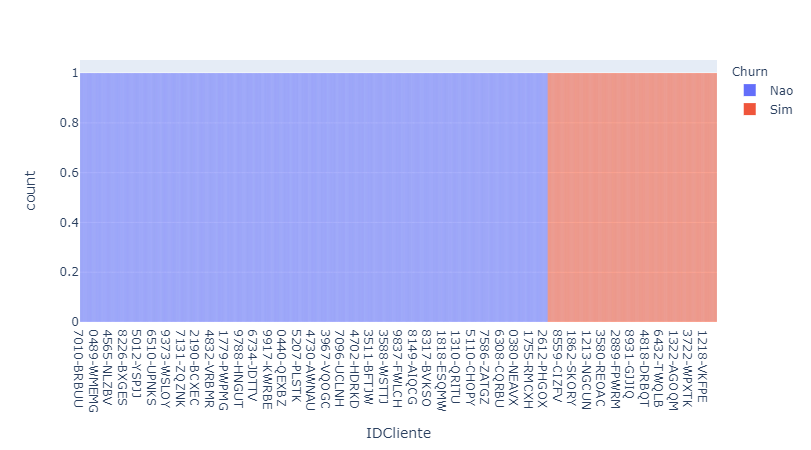

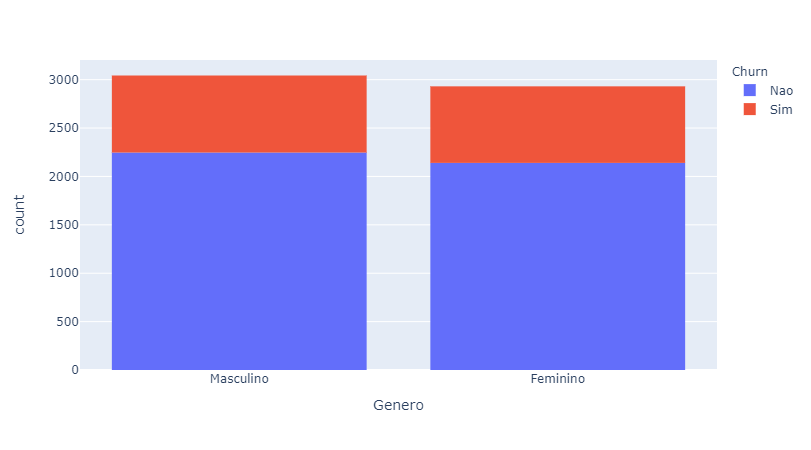

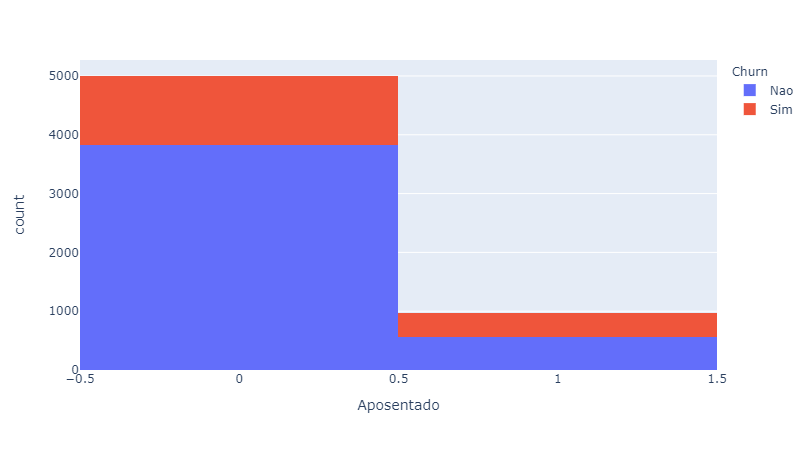

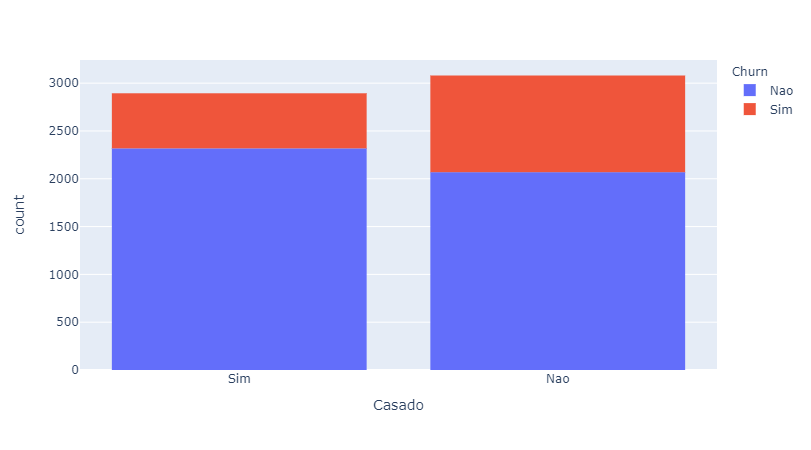

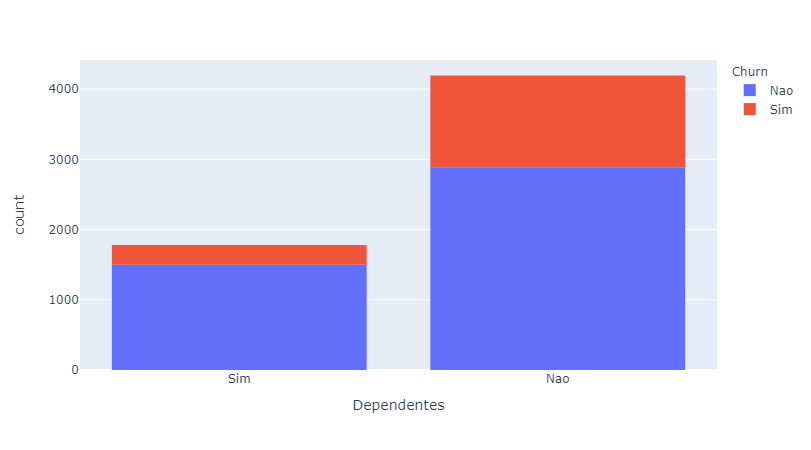

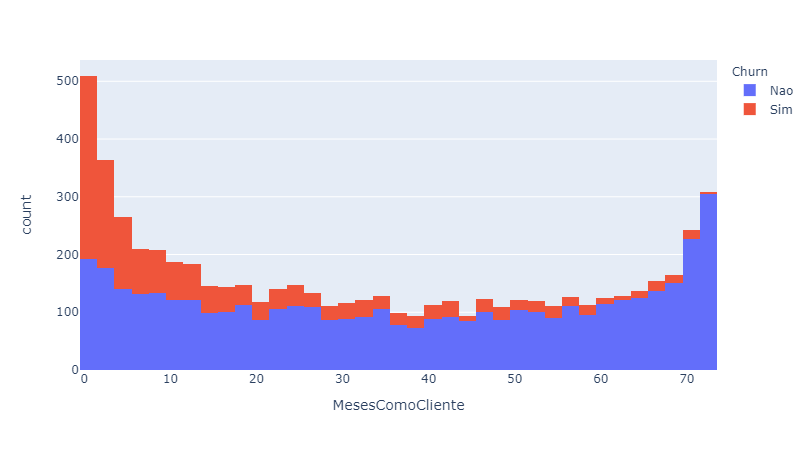

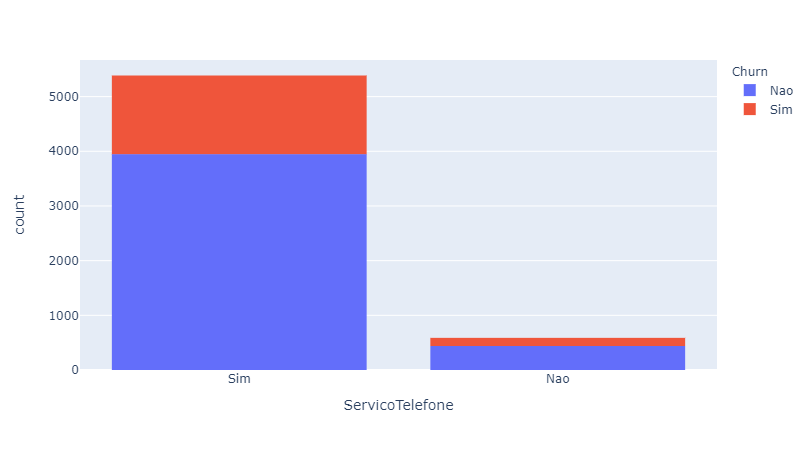

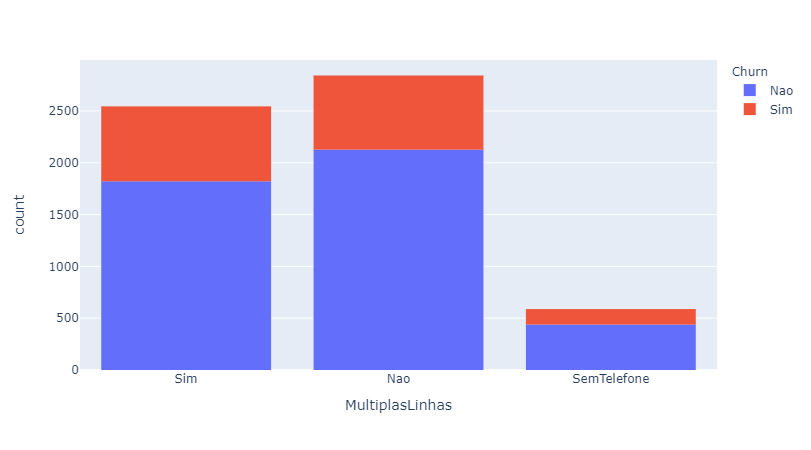

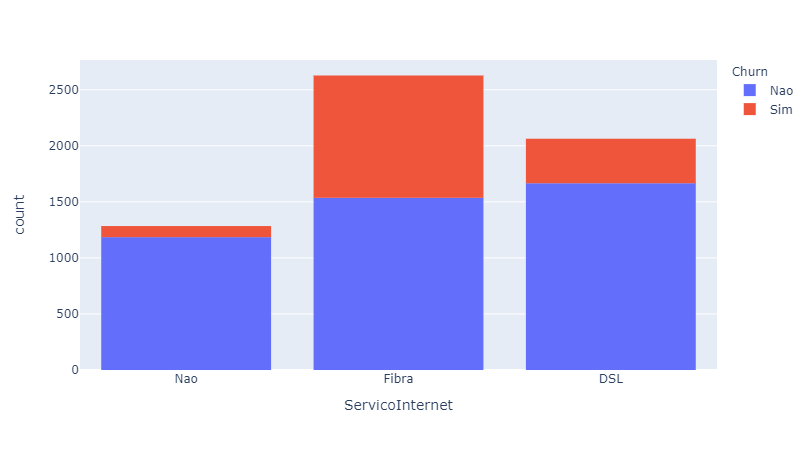

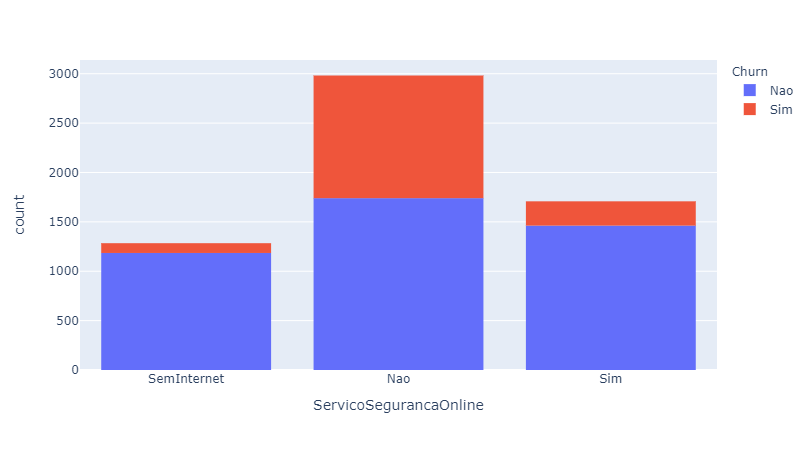

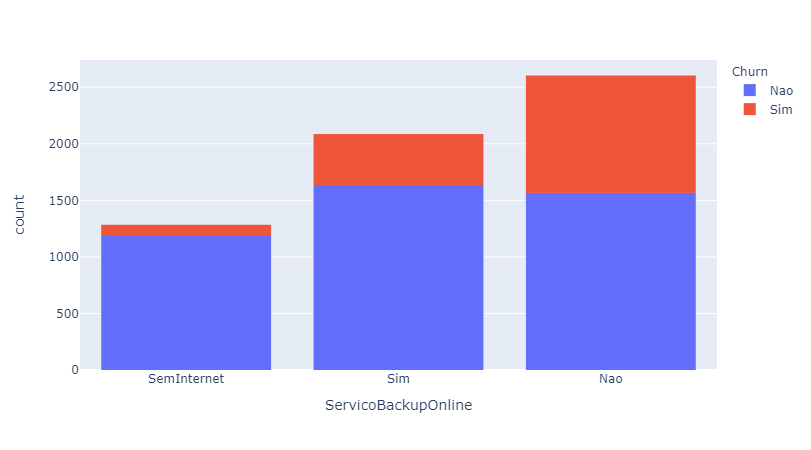

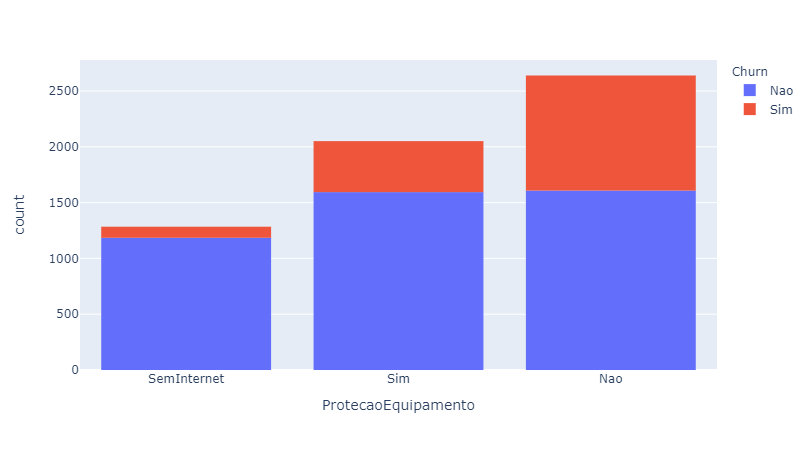

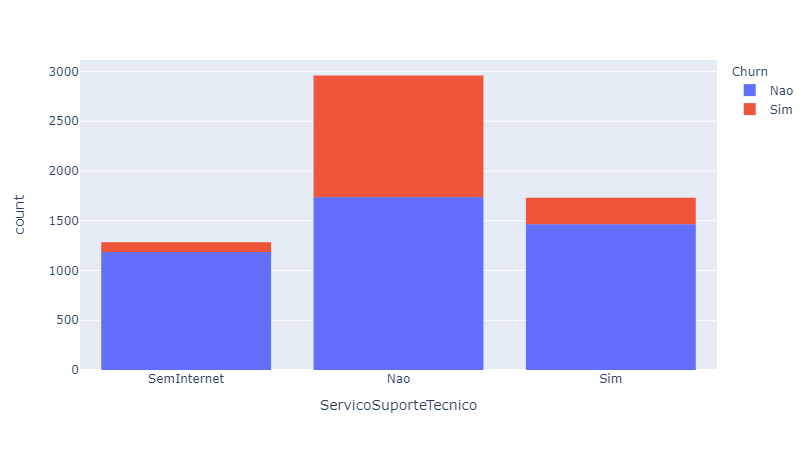

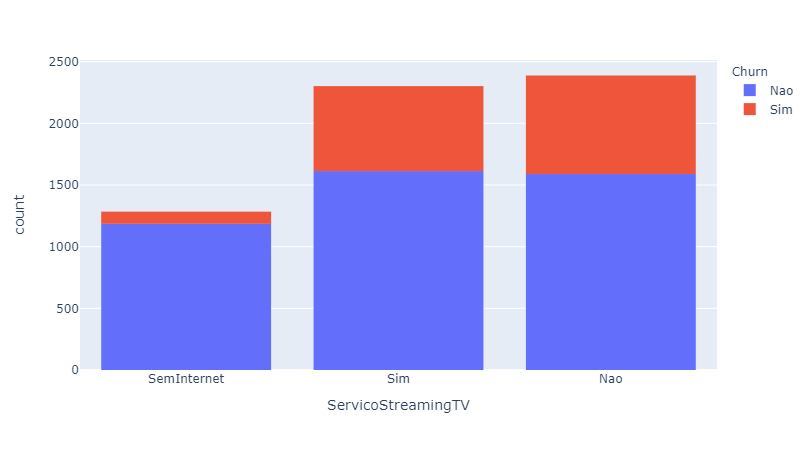

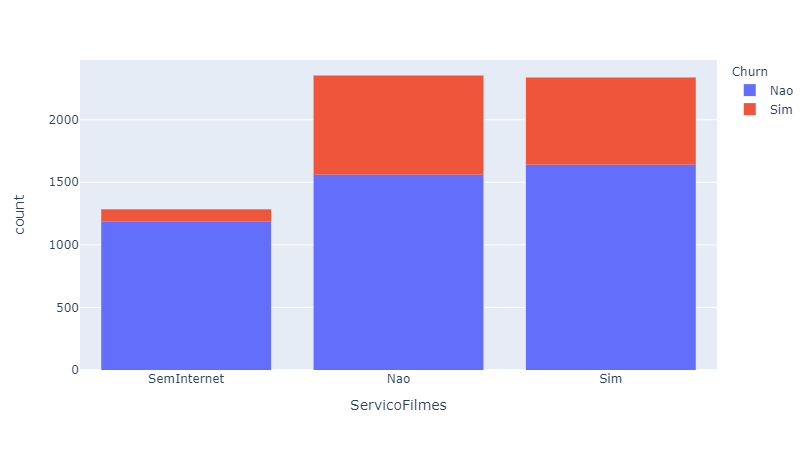

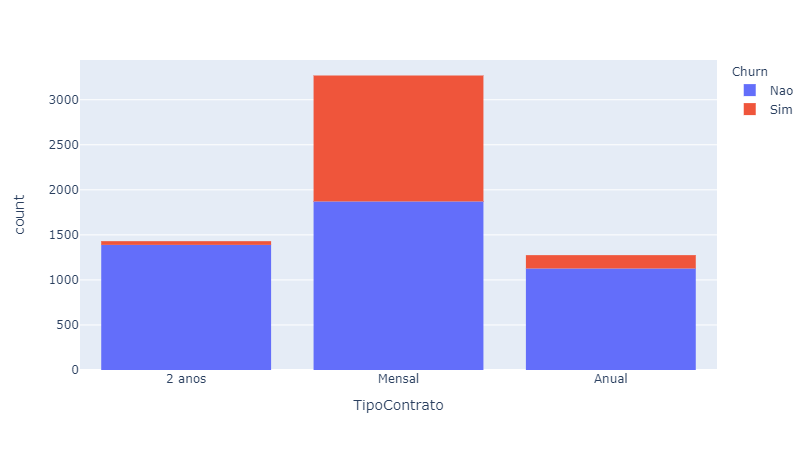

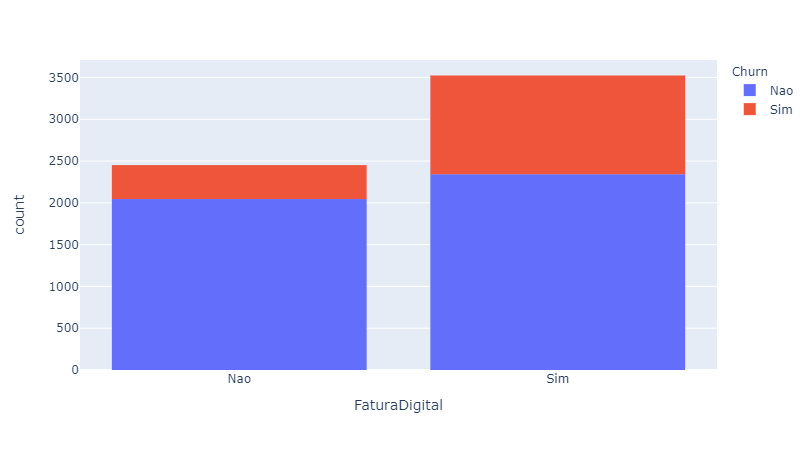

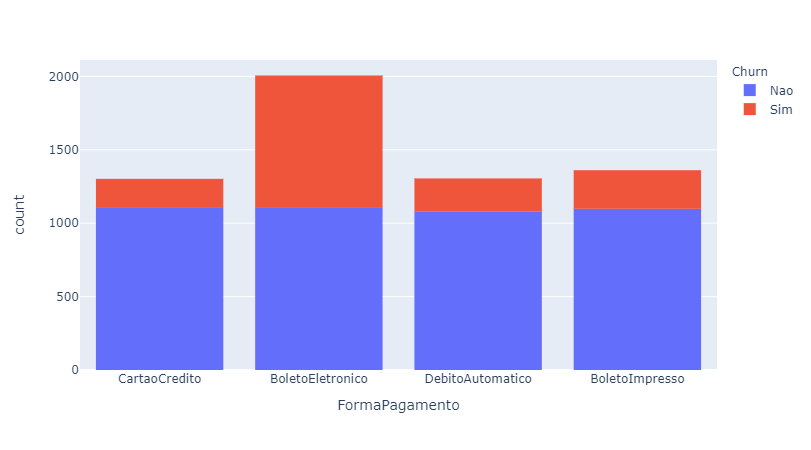

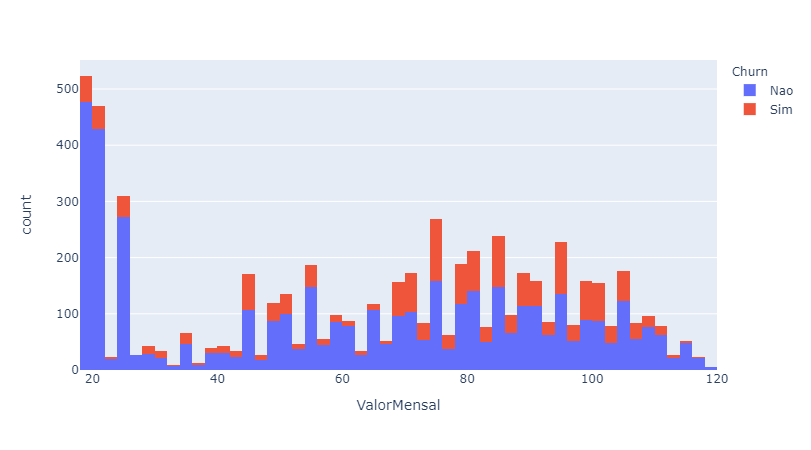

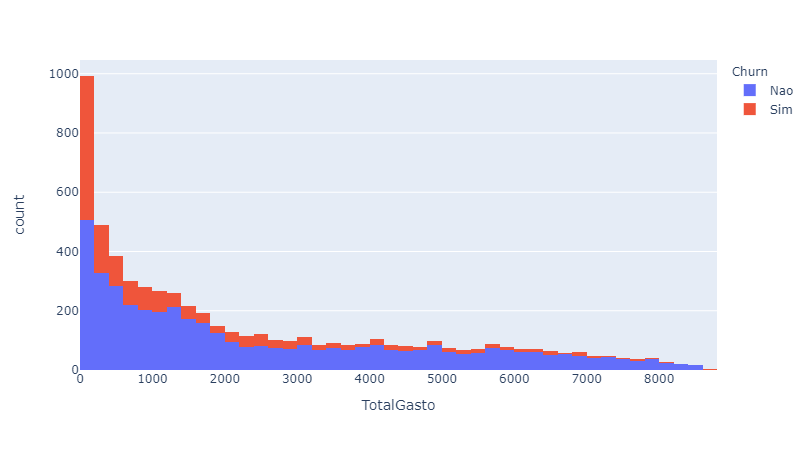

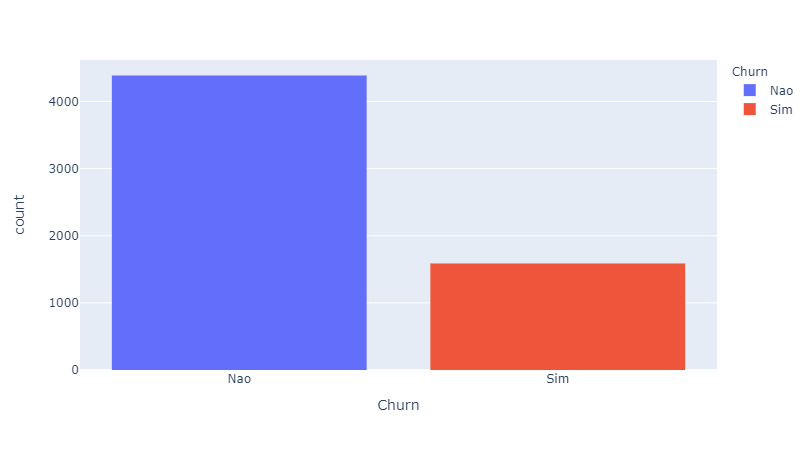

In [19]:
# Passo 5: Análise Mais completa
# comparar cada coluna da minha tabela com a coluna de cancelamento
import plotly.express as px

# etapa 1: criar o gráfico
for coluna in tabela.columns:
    # para edições nos gráficos: https://plotly.com/python/histograms/
    # para mudar a cor do gráfico, colocar parâmetro: color_discrete_sequence=["blue", "green"]
    grafico = px.histogram(tabela, x=coluna, color="Churn")
    # etapa 2: exibir o gráfico
    grafico.show()

In [11]:
!pip install plotly

### Conclusões e Ações

Escreva aqui suas conclusões:

- Clientes com contrato mensal tem MUITO mais chance de cancelar:
    - Podemos fazer promoções para o cliente ir para o contrato anual
    
- Familias maiores tendem a cancelar menos do que famílias menores
    - Podemos fazer promoções pra pessoa pegar uma linha adicional de telefone
    
- MesesComoCliente baixos tem MUITO cancelamento. Clientes com pouco tempo como cliente tendem a cancelar muito
    - A primeira experiência do cliente na operadora pode ser ruim
    - Talvez a captação de clientes tá trazendo clientes desqualificados
    - Ideia: a gente pode criar incentivo pro cara ficar mais tempo como cliente
    
- QUanto mais serviços o cara tem, menos chance dele cancelar
    - podemos fazer promoções com mais serviços pro cliente
    
- Tem alguma coisa no nosso serviço de Fibra que tá fazendo os clientes cancelarem
    - Agir sobre a fibra
    
- Clientes no boleto tem MUITO mais chance de cancelar, então temos que fazer alguma ação para eles irem para as outras formas de pagamento